In [23]:
# Importing modules

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import *


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis


import matplotlib.pyplot as plt
import seaborn as sns


In [24]:
# Reading in data
df = pd.read_csv("phishing.csv")

In [25]:
# Examining dataframe 
df.head()


,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1


In [26]:
# Checking for NA
df.isna()


,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11049,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11050,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11051,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11052,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [27]:
# Checking for NULL
df.isnull()


,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11049,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11050,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11051,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11052,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [28]:
df.columns

Index(['Index', 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')

In [29]:
# Verifying that all values are not null
df.notnull()


,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11049,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
11050,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
11051,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
11052,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [30]:
# Extracting labels
labels = df.loc[:, ~df.columns.str.contains('class')]
labels


,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,DisableRightClick,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,1,-1,-1,0,-1,1,1,1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,1,-1,1,-1,1,0,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,1,-1,-1,1,-1,1,-1,1
3,3,1,0,-1,1,1,-1,1,1,-1,...,1,-1,1,-1,-1,0,-1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,1,-1,1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11049,11049,1,-1,1,-1,1,1,1,1,-1,...,-1,-1,-1,1,1,-1,-1,1,1,1
11050,11050,-1,1,1,-1,-1,-1,1,-1,-1,...,1,-1,1,1,1,1,1,1,-1,1
11051,11051,1,-1,1,1,1,-1,1,-1,-1,...,1,1,1,1,1,1,-1,1,0,1
11052,11052,-1,-1,1,1,1,-1,-1,-1,1,...,1,-1,1,1,1,1,-1,1,1,1


In [31]:

# Create a correlation matrix
corr_matrix = labels.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
print(pd.DataFrame(upper))

                     Index  UsingIP   LongURL  ShortURL   Symbol@  \
Index                  NaN  0.38862  0.006441  0.006221  0.169437   
UsingIP                NaN      NaN  0.052159  0.403547  0.158766   
LongURL                NaN      NaN       NaN  0.097976  0.075205   
ShortURL               NaN      NaN       NaN       NaN  0.104433   
Symbol@                NaN      NaN       NaN       NaN       NaN   
Redirecting//          NaN      NaN       NaN       NaN       NaN   
PrefixSuffix-          NaN      NaN       NaN       NaN       NaN   
SubDomains             NaN      NaN       NaN       NaN       NaN   
HTTPS                  NaN      NaN       NaN       NaN       NaN   
DomainRegLen           NaN      NaN       NaN       NaN       NaN   
Favicon                NaN      NaN       NaN       NaN       NaN   
NonStdPort             NaN      NaN       NaN       NaN       NaN   
HTTPSDomainURL         NaN      NaN       NaN       NaN       NaN   
RequestURL             NaN      Na

In [32]:
relevant = [1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 14, 15, 16, 17, 18, 23, 24, 25, 28, 30]
features = np.array(labels.columns)[relevant]
features

array(['UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'DomainRegLen', 'Favicon',
       'HTTPSDomainURL', 'RequestURL', 'AnchorURL', 'LinksInScriptTags',
       'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'IframeRedirection', 'AgeofDomain', 'DNSRecording', 'GoogleIndex',
       'StatsReport'], dtype=object)

In [33]:
labels = labels[features]


In [34]:
# Extracting target
target = df['class']
target



0       -1
1       -1
2       -1
3        1
4        1
        ..
11049    1
11050   -1
11051   -1
11052   -1
11053   -1
Name: class, Length: 11054, dtype: int64

In [35]:
# Train test split
training_labels, testing_labels, training_target, testing_target  = train_test_split(labels, target, random_state = 42, )


In [36]:
'''
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

# Define the range of hyperparameters for each classifier
param_grid_lr = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}
param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 10]
}
param_grid_dt = {
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
param_grid_knn = {
    'n_neighbors': [5, 10, 15],
    'weights': ['uniform', 'distance']
}
param_grid_ada = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0]
}

# Create a list of classifiers with their corresponding hyperparameters
classifiers = [
    (LogisticRegression(), param_grid_lr),
    (SVC(), param_grid_svc),
    (RandomForestClassifier(random_state=42), param_grid_rf),
    (GradientBoostingClassifier(random_state=42), param_grid_gb),
    (DecisionTreeClassifier(random_state=42), param_grid_dt),
    (KNeighborsClassifier(), param_grid_knn),
    (GaussianNB(), None),
    (AdaBoostClassifier(random_state=42), param_grid_ada),
    (LinearDiscriminantAnalysis(), None),
    (QuadraticDiscriminantAnalysis(), None)
]

# Loop over the classifiers and perform grid search
for clf, param_grid in classifiers:
    if param_grid is not None:
        grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5)
        grid_search.fit(training_labels, training_target)
        print(clf.__class__.__name__)
        print("Best parameters:", grid_search.best_params_)
        print("Training accuracy:", grid_search.best_score_)
        print("Test accuracy:", grid_search.score(testing_labels, testing_target))
        print("---")
    else:
        clf.fit(training_labels, training_target)
        print(clf.__class__.__name__)
        print("Training accuracy:", clf.score(training_labels, training_target))
        print("Test accuracy:", clf.score(testing_labels, testing_target))
        print("---")
'''

'\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.svm import SVC\nfrom sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier\nfrom sklearn.tree import DecisionTreeClassifier\nfrom sklearn.neighbors import KNeighborsClassifier\nfrom sklearn.naive_bayes import GaussianNB\nfrom sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis\n\n# Define the range of hyperparameters for each classifier\nparam_grid_lr = {\n    \'penalty\': [\'l1\', \'l2\'],\n    \'C\': [0.1, 1, 10],\n    \'solver\': [\'liblinear\', \'saga\']\n}\nparam_grid_svc = {\n    \'C\': [0.1, 1, 10],\n    \'kernel\': [\'linear\', \'rbf\', \'poly\'],\n    \'gamma\': [\'scale\', \'auto\']\n}\nparam_grid_rf = {\n    \'n_estimators\': [50, 100, 200],\n    \'max_depth\': [5, 10, 20],\n    \'max_features\': [\'sqrt\', \'log2\'],\n    \'min_samples_split\': [2, 5, 10],\n    \'min_samples

In [37]:
# Populating a list of classifiers with hyperparameters
classifiers = [
    RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
    GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, max_depth=5, random_state=42),
    DecisionTreeClassifier(max_depth=10, random_state=42),
]



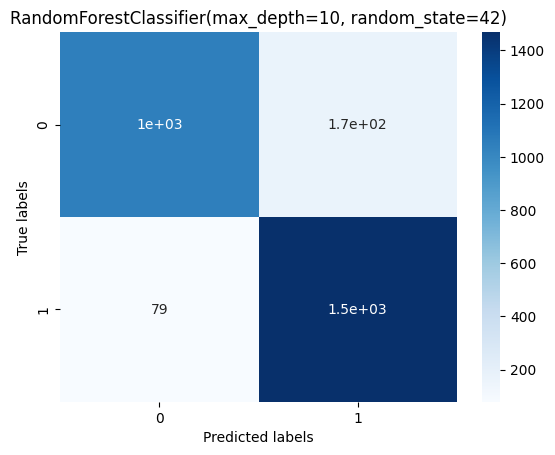

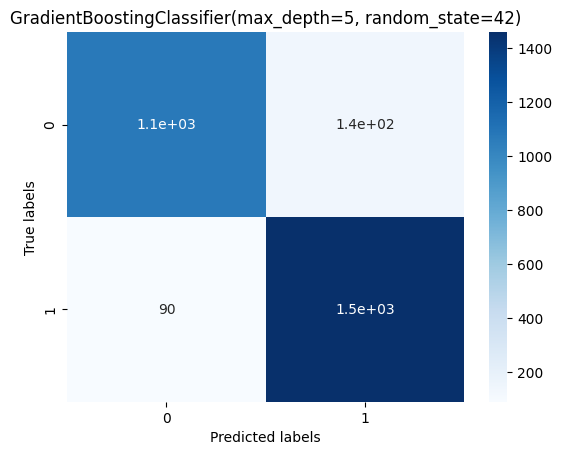

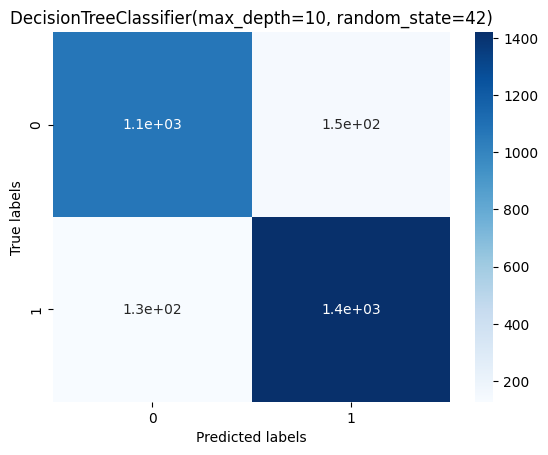

In [38]:
# Dictionary to store prediction data
predictions = {}

models = []

# Iterating over all classifiers
for classifier in classifiers:

    # Fitting classifier
    classifier.fit(training_labels.values, training_target.values)

    # Updating predictions dict
    predictions[str(classifier)] = classifier.predict(testing_labels.values)

    # Obtaining confusion matrix
    cm = confusion_matrix(y_pred= predictions[str(classifier)], y_true = testing_target.values)
    models.append(classifier)

    # Plotting confusion matrix
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, cmap='Blues')
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title(str(classifier))
    plt.show()

  


In [39]:
# Obtaining metrics - accuracy, f1, recall, precision

'''
Accuracy = (True Positive + True Negative) / (True Positive + True Negative + False Negative + False Positive)
F1 : 2 * (Precision * Recall) / (Prevision + Recall)
Precision: (True Positive) / (True Positive + False Positive)
Recall: (True Positive) /  (True Positive + False Negative)
'''


metrics = { 'accuracy': [], 'f1' : [], 'recall' : [], 'precision' : []  }
for classifier_name, prediction in predictions.items():
    metrics['accuracy'].append(accuracy_score(testing_target, prediction))
    metrics['f1'].append(f1_score(testing_target, prediction, average='weighted'))
    metrics['recall'].append(recall_score(testing_target, prediction, average='weighted'))
    metrics['precision'].append(precision_score(testing_target, prediction, average='weighted'))
    

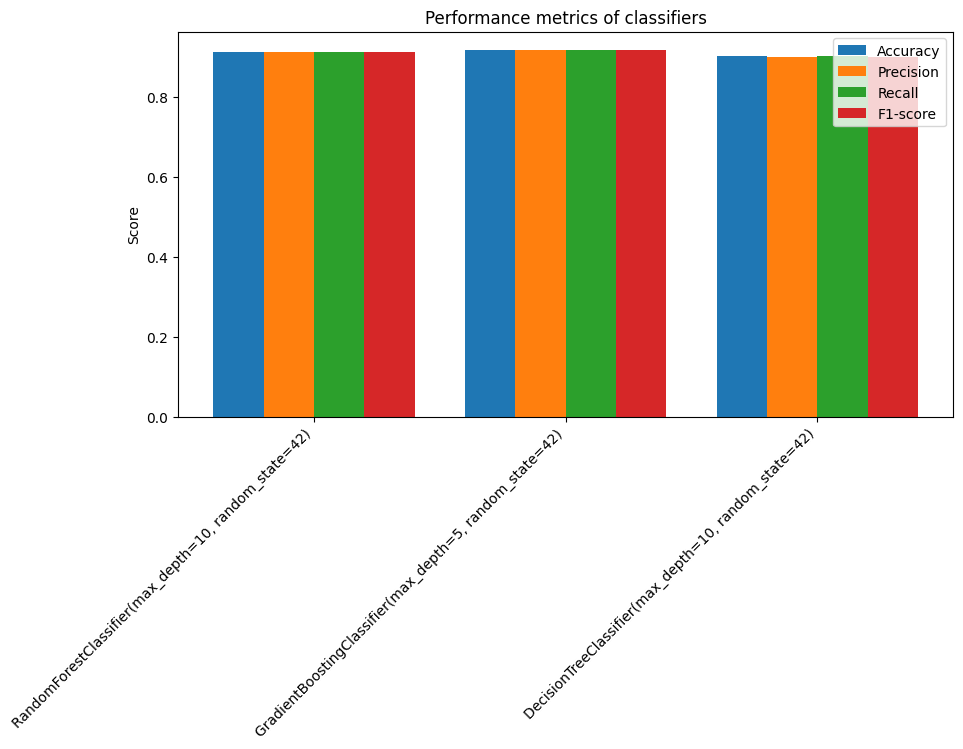

In [40]:
# Examining the performance metrics using a bar chart

fig, ax = plt.subplots(figsize=(10, 5))
x = np.arange(len(classifiers))
width = 0.2
rects1 = ax.bar(x - width*1.5, metrics['accuracy'], width, label='Accuracy')
rects2 = ax.bar(x - width*0.5, metrics['precision'], width, label='Precision')
rects3 = ax.bar(x + width*0.5, metrics['recall'], width, label='Recall')
rects4 = ax.bar(x + width*1.5, metrics['f1'], width, label='F1-score')
ax.set_xticks(x)
ax.set_xticklabels(classifiers, rotation=45, ha='right')
ax.legend()
ax.set_ylabel('Score')
ax.set_title('Performance metrics of classifiers')
plt.show()

In [41]:
# Creating DataFrame from metrics dictionary
performance = pd.DataFrame(metrics)

# Adding a column for classifier names
performance['Classifier'] = list(predictions.keys())

# Reordering columns for better visibility
performance = performance[['Classifier', 'accuracy', 'f1', 'recall', 'precision']]

# Displaying DataFrame
performance.head(11)

,Classifier,accuracy,f1,recall,precision
0,"RandomForestClassifier(max_depth=10, random_st...",0.911360,0.910927,0.911360,0.912354
1,"GradientBoostingClassifier(max_depth=5, random...",0.916425,0.916208,0.916425,0.916627
2,"DecisionTreeClassifier(max_depth=10, random_st...",0.900145,0.900051,0.900145,0.900053


In [43]:
print(models[2].__class__.__name__, models[2].feature_importances_)

DecisionTreeClassifier [0.01089927 0.01373496 0.01748656 0.00356606 0.00675057 0.05112173
 0.04090088 0.01152782 0.01020521 0.00591642 0.01391671 0.6834827
 0.0750728  0.02036994 0.0012082  0.00600009 0.00187367 0.00821024
 0.00299722 0.0117248  0.00303414]


In [44]:
# Dictionary to store prediction data
predictions_train = {}

models = []

# Iterating over all classifiers
for model in models:

    # Fitting classifier
    # model.fit(training_labels.values, training_target.values)

    # Updating predictions dict
    predictions[str(classifier)] = classifier.predict(testing_labels.values)

    # Obtaining confusion matrix
    cm = confusion_matrix(y_pred= predictions[str(classifier)], y_true = testing_target.values)
    models.append(classifier)

    # Plotting confusion matrix
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, cmap='Blues')
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title(str(classifier))
    plt.show()

  
